In [1]:
#basic library imports for cryptocurrency forecasting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have your DataFrame 'df' with the 'Close' column
# Here's a sample DataFrame for demonstration purposes:
data = {
    'Date': pd.date_range(start='2023-07-06', periods=100, freq='D'),
    'Close': [i for i in range(100)]
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Fit ARIMA model to the data
model = ARIMA(df['Close'], order=(1, 0, 5))
model_fit = model.fit()

# Generate future dates for prediction (next 30 days from the last date of the dataset)
last_date = df.index[-1]
index_future_dates = pd.date_range(start=last_date, periods=30, freq='D')

# Make predictions for the next 30 days
pred = model_fit.predict(start=len(df), end=len(df) + 29, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates

print(pred)


   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Dogecoin   DOGE  2013-12-16 23:59:59  0.000866  0.000150  0.000299   
1    2  Dogecoin   DOGE  2013-12-17 23:59:59  0.000289  0.000116  0.000207   
2    3  Dogecoin   DOGE  2013-12-18 23:59:59  0.000362  0.000205  0.000267   
3    4  Dogecoin   DOGE  2013-12-19 23:59:59  0.001520  0.000328  0.000395   
4    5  Dogecoin   DOGE  2013-12-20 23:59:59  0.001143  0.000662  0.001143   

      Close  Volume     Marketcap  
0  0.000205     0.0  1.509085e+06  
1  0.000269     0.0  2.169688e+06  
2  0.000362     0.0  3.188943e+06  
3  0.001162     0.0  1.115034e+07  
4  0.000704     0.0  7.284337e+06  

 Data Types:
SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object


In [3]:
df = pd.read_csv('coin_Dogecoin.csv')
print (df.head())
print ('\n Data Types:')
print (df.dtypes)

   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Dogecoin   DOGE  2013-12-16 23:59:59  0.000866  0.000150  0.000299   
1    2  Dogecoin   DOGE  2013-12-17 23:59:59  0.000289  0.000116  0.000207   
2    3  Dogecoin   DOGE  2013-12-18 23:59:59  0.000362  0.000205  0.000267   
3    4  Dogecoin   DOGE  2013-12-19 23:59:59  0.001520  0.000328  0.000395   
4    5  Dogecoin   DOGE  2013-12-20 23:59:59  0.001143  0.000662  0.001143   

      Close  Volume     Marketcap  
0  0.000205     0.0  1.509085e+06  
1  0.000269     0.0  2.169688e+06  
2  0.000362     0.0  3.188943e+06  
3  0.001162     0.0  1.115034e+07  
4  0.000704     0.0  7.284337e+06  

 Data Types:
SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object


In [4]:
#convert to timeseries
ts = df['Low']
ts.head(50)

0     0.000150
1     0.000116
2     0.000205
3     0.000328
4     0.000662
5     0.000354
6     0.000280
7     0.000294
8     0.000450
9     0.000558
10    0.000543
11    0.000497
12    0.000458
13    0.000399
14    0.000416
15    0.000408
16    0.000423
17    0.000331
18    0.000293
19    0.000256
20    0.000247
21    0.000226
22    0.000220
23    0.000203
24    0.000212
25    0.000241
26    0.000334
27    0.000323
28    0.000260
29    0.000276
30    0.000341
31    0.000370
32    0.000376
33    0.000416
34    0.000578
35    0.000685
36    0.001252
37    0.001365
38    0.001496
39    0.001631
40    0.001750
41    0.001498
42    0.001219
43    0.001223
44    0.001346
45    0.001444
46    0.001509
47    0.001457
48    0.001089
49    0.001227
Name: Low, dtype: float64

In [5]:

ts.tail(30)

2730    0.329806
2731    0.296660
2732    0.313131
2733    0.323278
2734    0.311502
2735    0.301804
2736    0.307892
2737    0.320087
2738    0.316976
2739    0.305485
2740    0.303316
2741    0.280481
2742    0.286189
2743    0.256467
2744    0.166491
2745    0.164654
2746    0.180979
2747    0.222527
2748    0.230006
2749    0.230972
2750    0.240894
2751    0.250762
2752    0.252988
2753    0.238268
2754    0.238677
2755    0.238848
2756    0.242454
2757    0.243425
2758    0.227838
2759    0.229842
Name: Low, dtype: float64

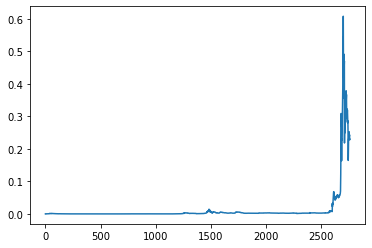

In [6]:
# plotting the converted time series
plt.plot(ts)

In [7]:
#import adfuller
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determinig rolling mean and statistics
    rolmean = pd.Series(timeseries).rolling(window=80).mean()
    rolstd = pd.Series(timeseries).rolling(window=80).std()
    #plot rolling mean and statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard mDeviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

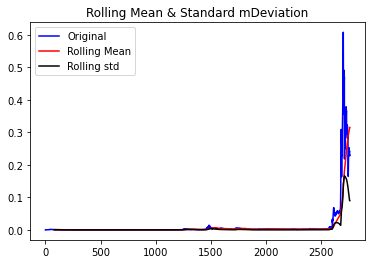

Results of Dickey-Fuller Test:
Test Statistic                   -2.398150
p-value                           0.142259
#Lags Used                       26.000000
Number of Observations Used    2733.000000
Critical Value (1%)              -3.432745
Critical Value (5%)              -2.862598
Critical Value (10%)             -2.567333
dtype: float64


In [8]:
#testing the stationarity of ts
test_stationarity(ts)

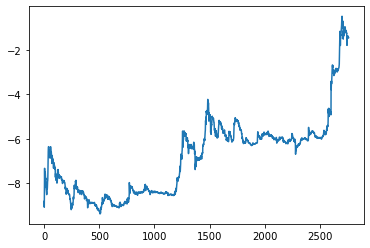

In [9]:
#estimating and eliminating trend
ts_log = np.log(ts)
plt.plot(ts_log)

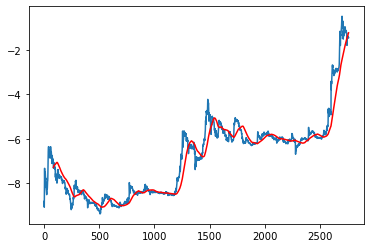

In [10]:
#moving average
moving_avg = ts_log.rolling(85).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [11]:
#subtract the rolling mean or moving average (both are same) from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(85)

ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(85)


84     0.122937
85    -0.052346
86     0.042195
87     0.153671
88     0.150253
         ...   
164   -0.289163
165   -0.405612
166   -0.414522
167   -0.400217
168   -0.236541
Name: Low, Length: 85, dtype: float64

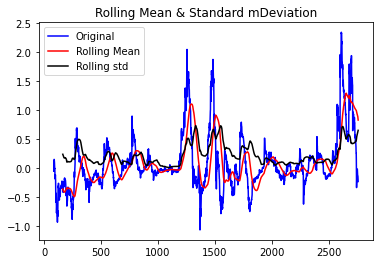

Results of Dickey-Fuller Test:
Test Statistic                   -5.226591
p-value                           0.000008
#Lags Used                       27.000000
Number of Observations Used    2648.000000
Critical Value (1%)              -3.432822
Critical Value (5%)              -2.862632
Critical Value (10%)             -2.567351
dtype: float64


In [12]:
#checking stationary for subtracted moving average from original series
test_stationarity(ts_log_moving_avg_diff)

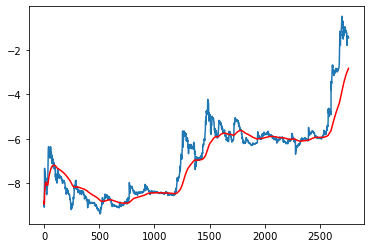

In [13]:
#plotting exponential value
expwighted_avg = ts_log.ewm(halflife=85, min_periods=0, adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

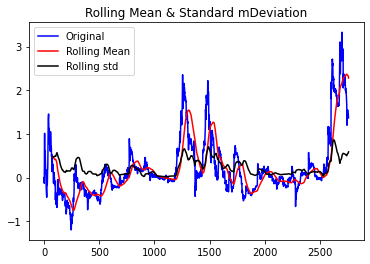

Results of Dickey-Fuller Test:
Test Statistic                   -3.109349
p-value                           0.025869
#Lags Used                       28.000000
Number of Observations Used    2731.000000
Critical Value (1%)              -3.432747
Critical Value (5%)              -2.862599
Critical Value (10%)             -2.567334
dtype: float64


In [14]:
# subtract trend eliminated value from exponential wighted average
ts_log_ewm_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewm_diff)

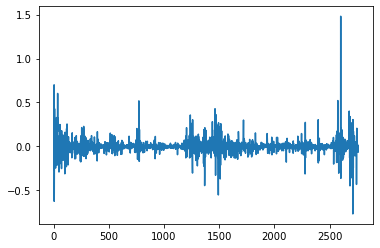

In [15]:
ts_log_diff = ts_log-ts_log.shift()
plt.plot(ts_log_diff)

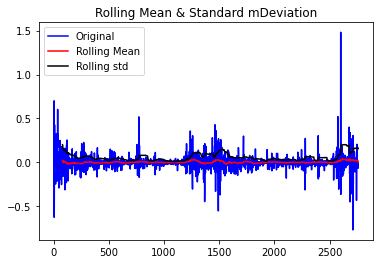

Results of Dickey-Fuller Test:
Test Statistic                -8.749471e+00
p-value                        2.862526e-14
#Lags Used                     2.700000e+01
Number of Observations Used    2.731000e+03
Critical Value (1%)           -3.432747e+00
Critical Value (5%)           -2.862599e+00
Critical Value (10%)          -2.567334e+00
dtype: float64


In [16]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

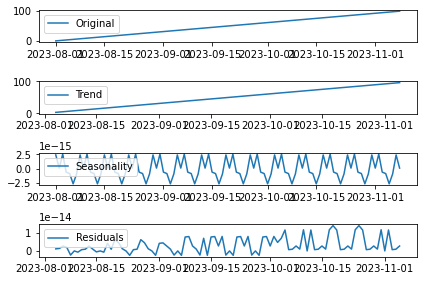

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have your time series data in a DataFrame with a DatetimeIndex
# Here, I'm creating a sample DataFrame for demonstration purposes.
# Replace this with your actual time series data.
data = {
    'date': pd.date_range(start='2023-08-01', periods=100, freq='D'),
    'value': [i for i in range(100)]
}

df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Ensure that the time series data has a frequency set
# You can set the frequency explicitly when creating the DataFrame, as shown above.
# Alternatively, you can infer the frequency using pd.infer_freq() as follows:
# df.index.freq = pd.infer_freq(df.index)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['value'], model='additive')  # Use 'multiplicative' for non-linear trends

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.subplot(411)
plt.plot(df['value'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [20]:
#forecasting  a timeseries

#import arima
from statsmodels.tsa.arima_model import ARIMA

#importing and plotting acf and pacf
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)


C:\Users\m.mohammed shameem\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

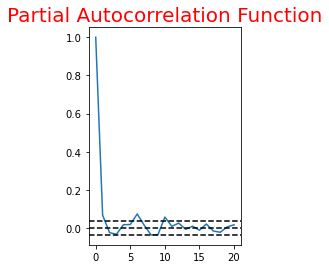

In [21]:
#plotting acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function', color= 'red', fontsize='20')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

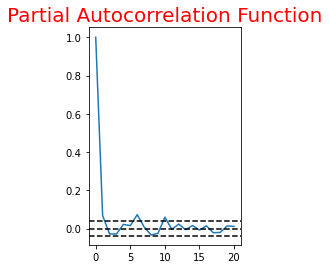

In [22]:
#plotting acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function', color= 'red', fontsize='20')

C:\Users\m.mohammed shameem\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'RSS: 17.1874')

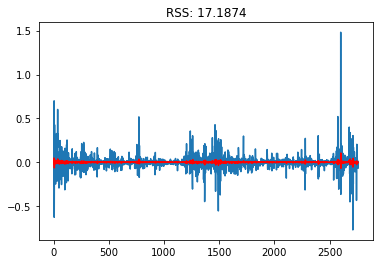

In [23]:
#plotting AR model

model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


Text(0.5, 1.0, 'RSS: 17.1913')

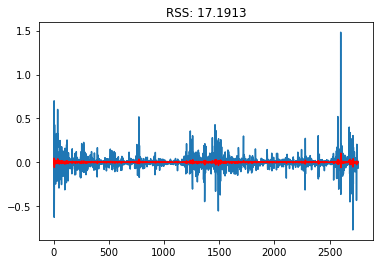

In [24]:
#plotting MA model

model = ARIMA(ts_log, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 17.0954')

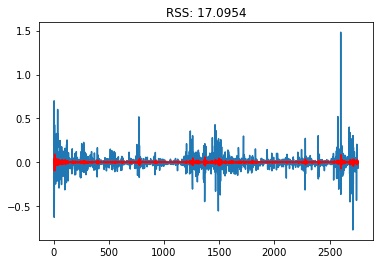

In [25]:
#combined model of ARIMA

model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [26]:
#taking it back to original scale

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

1    0.002636
2   -0.011686
3    0.041582
4    0.030138
5   -0.001605
dtype: float64


In [27]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())


1    0.002636
2   -0.009050
3    0.032532
4    0.062670
5    0.061064
dtype: float64


In [28]:
ts_log

0      -8.803456
1      -9.065435
2      -8.494415
3      -8.021574
4      -7.320621
          ...   
2755   -1.431927
2756   -1.416942
2757   -1.412946
2758   -1.479120
2759   -1.470365
Name: Low, Length: 2760, dtype: float64

In [29]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

0   -8.803456
1   -8.800820
2   -8.812506
3   -8.770925
4   -8.740787
dtype: float64

Text(0.5, 1.0, 'RMSE: 0.0475')

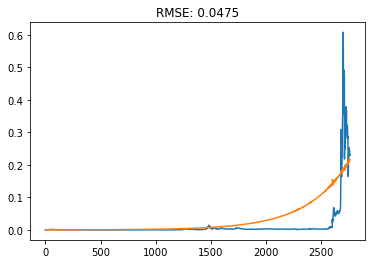

In [30]:

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [56]:
## ARMA MODEL

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [60]:
plt.rcParams['figure.figsize'] = [10, 7.5]

In [61]:
##simulate arma (1,1) process
ar1 = np.array([1, 0.33])
ma1 = np.array([1,0.9])

In [62]:
ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

<function matplotlib.pyplot.show(close=None, block=None)>

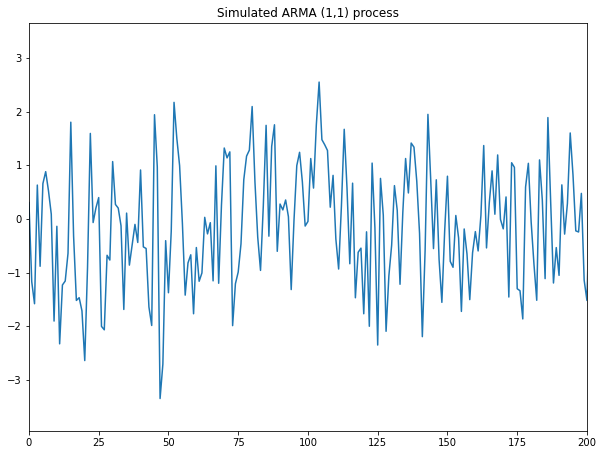

In [63]:
#plotting arma
plt.plot(ARMA_1)
plt.title('Simulated ARMA (1,1) process')
plt.xlim([0, 200])
plt.show

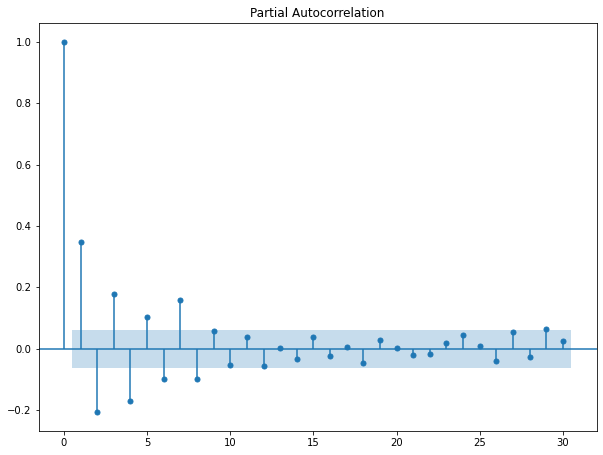

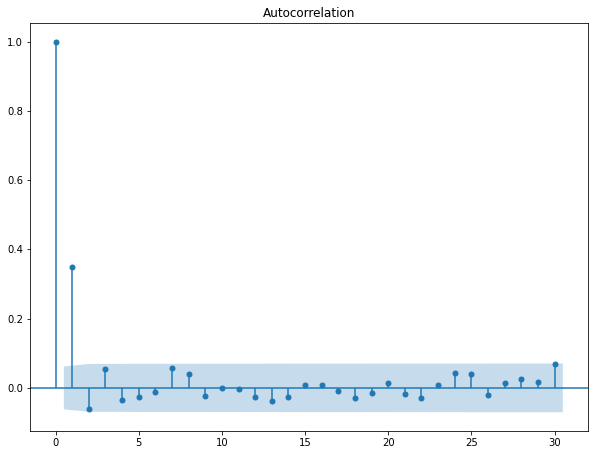

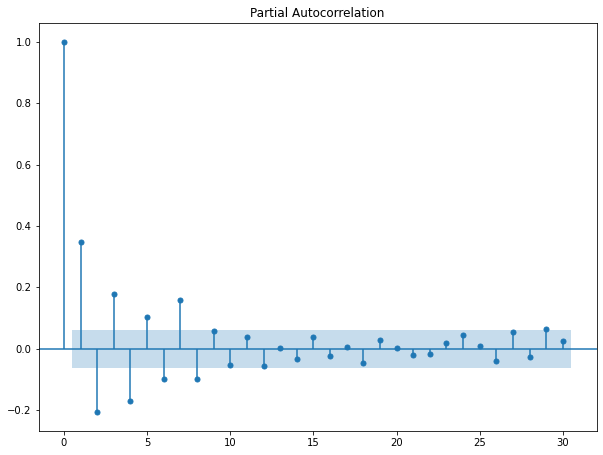

In [64]:
#plotting acf and pcf of arma 
plot_acf(ARMA_1);
plot_pacf(ARMA_1)

In [65]:
##simulate ARMA (2,2) process
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0.9, 0.3])

In [66]:
ARMA_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

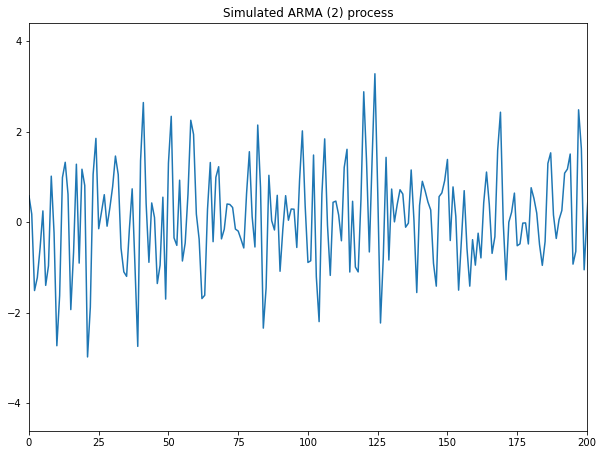

In [67]:

#plotting arma(2)
plt.plot(ARMA_2)
plt.title('Simulated ARMA (2) process')
plt.xlim([0, 200])
plt.show()

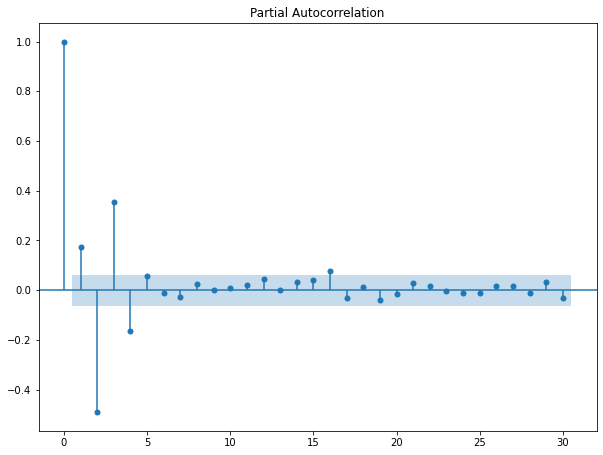

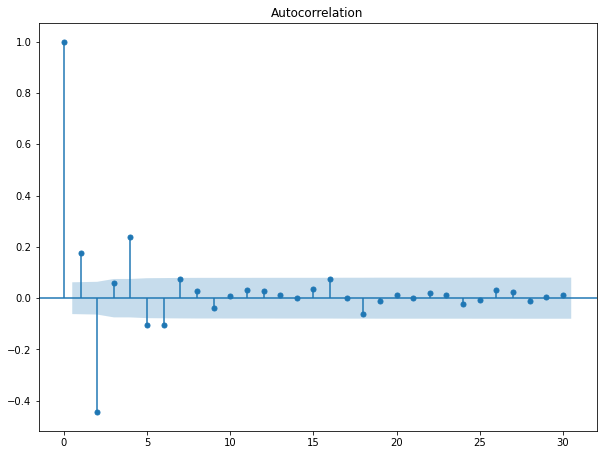

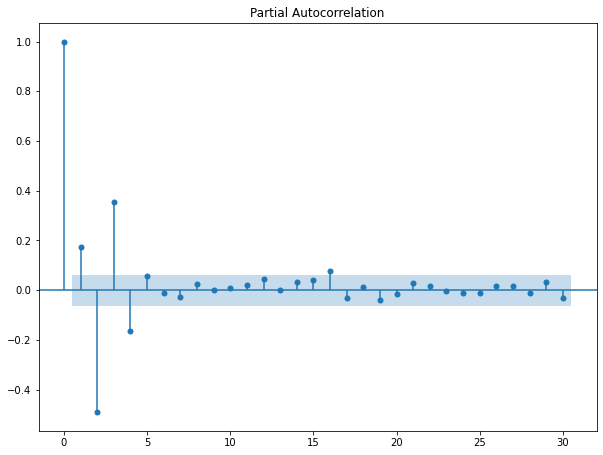

In [68]:
#plotting acf and pcf of arma(2)
plot_acf(ARMA_2);
plot_pacf(ARMA_2)

In [72]:
#installing pmdarima
import pmdarima

In [73]:
#importing auto arima
from pmdarima import auto_arima
#import harmless warnings"
import warnings
warnings.filterwarnings("ignore")

            Close
Date             
2023-08-01      0
2023-08-02      1
2023-08-03      2
2023-08-04      3
2023-08-05      4
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-08-01 to 2023-11-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB
None


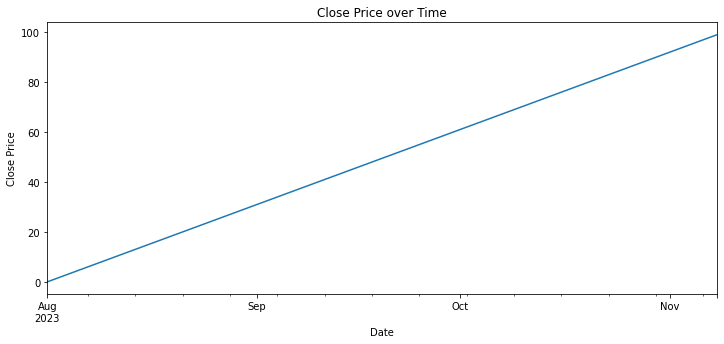

In [74]:
#plotting close values from datasets
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'df' with the 'Close' column
# Here's a sample DataFrame for demonstration purposes:
data = {
    'Date': pd.date_range(start='2023-08-01', periods=100, freq='D'),
    'Close': [i for i in range(100)]
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Verify the contents of the DataFrame and column name
print(df.head())
print(df.info())

# Plot the 'Close' column
df['Close'].plot(figsize=(12, 5))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price over Time')
plt.show()


In [75]:
#importing adfuller 
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ",dftest[1])
    print("3. Num Of Lags : ",dftest[2])
    print("4. Num Of Observations Used For ADF Rgression and Critical Values Calculations : ",dftest[3])
    print("5. Critical Values :")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (dfoutput)
    for key, val in dftest[4].items():
         dfoutput['Critical Values (%5)'%key]

In [76]:
#importing auto arima
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [77]:
#stepwise method
stepwise_fit = auto_arima(df['Close'], trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2130.419, Time=0.09 sec
Total fit time: 0.103 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1067.210
Date:                Thu, 03 Aug 2023   AIC                          -2130.419
Time:                        01:02:11   BIC                          -2125.229
Sample:                             0   HQIC                         -2128.319
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0000   1.88e-06   5.31e+05      0.000       1.000       1.000
sigma2      2.475e-11   6.95e-10      0.036      0.972   -1.34e-09    1.39e-09
===================================================================================
Ljung-Box (L1) (Q):                  25.51   Jarque-Bera (JB):              8919.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.00
Prob(H) (two-sided):                  0.87   Kurtosis:                        49.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
#test and train
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(100, 1)
(70, 1) (30, 1)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   99
Model:                 ARIMA(1, 0, 5)   Log Likelihood                1053.158
Date:                Thu, 03 Aug 2023   AIC                          -2090.316
Time:                        01:03:04   BIC                          -2069.555
Sample:                    08-02-2023   HQIC                         -2081.916
                         - 11-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   1.64e-13    6.1e+12      0.000       1.000       1.000
ar.L1       4.868e-18   7.83e-19      6.219      0.000    3.33e-18     6.4e-18
ma.L1      -4.868e-18   7.83e-19     -6.219      0.0

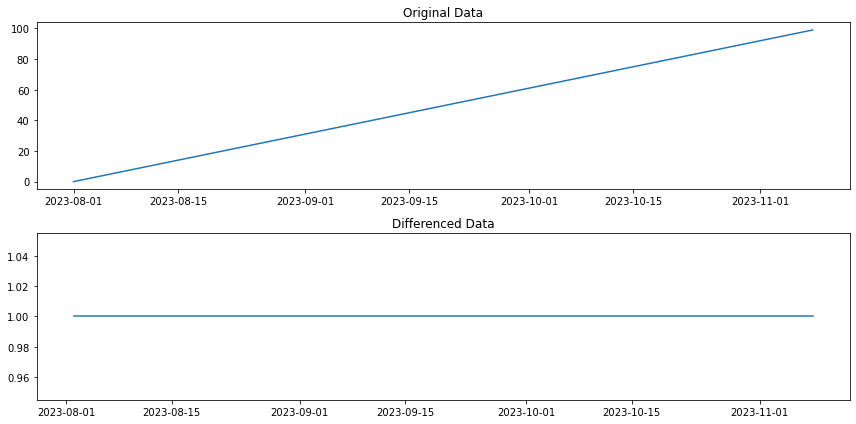

In [82]:
##train results of ARMA model 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have your DataFrame 'train' with the 'Close' column
# Here's a sample DataFrame for demonstration purposes:
data = {
    'Date': pd.date_range(start='2023-08-01', periods=100, freq='D'),
    'Close': [i for i in range(100)]
}

train = pd.DataFrame(data)
train.set_index('Date', inplace=True)

# Induce stationarity using differencing
train_diff = train['Close'].diff().dropna()

# Fit ARIMA model
model = ARIMA(train_diff, order=(1, 0, 5))
model_fit = model.fit()

print(model_fit.summary())

# Plot the original data and differenced data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(train['Close'])
plt.title('Original Data')
plt.subplot(2, 1, 2)
plt.plot(train_diff)
plt.title('Differenced Data')
plt.tight_layout()
plt.show()


In [85]:
#making predictions in test set
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have your DataFrame 'train' and 'test' with the 'Close' column
# Here's a sample DataFrame for demonstration purposes:
data = {
    'Date': pd.date_range(start='2023-08-01', periods=100, freq='D'),
    'Close': [i for i in range(100)]
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Split data into train and test sets
train = df.iloc[:80]  # Replace this with your actual train data
test = df.iloc[80:]   # Replace this with your actual test data

# Fit ARIMA model to the training data
model = ARIMA(train['Close'], order=(1, 0, 5))
model_fit = model.fit()

# Make predictions on the test set
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels')

# Convert the index of predictions to match the test set index
pred.index = test.index

print(pred)


Date
2023-10-20    79.966255
2023-10-21    80.769339
2023-10-22    81.252763
2023-10-23    81.418969
2023-10-24    81.425687
2023-10-25    81.399909
2023-10-26    81.374148
2023-10-27    81.348403
2023-10-28    81.322673
2023-10-29    81.296959
2023-10-30    81.271261
2023-10-31    81.245579
2023-11-01    81.219912
2023-11-02    81.194261
2023-11-03    81.168626
2023-11-04    81.143007
2023-11-05    81.117404
2023-11-06    81.091816
2023-11-07    81.066244
2023-11-08    81.040688
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

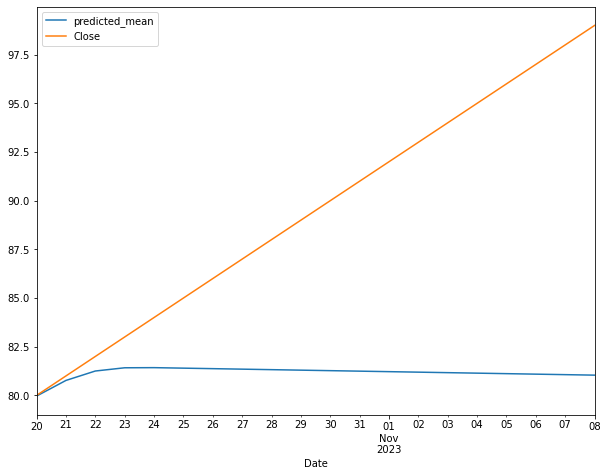

In [86]:
#predicting legend in close dataset
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [87]:
#mean value of close
test['Close'].mean()

89.5

In [88]:
#importing and printing the value of rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

10.117804661810425


In [89]:
len(df)

100

In [90]:
# here we are going to see at which date our dataset ends
model2=ARIMA(df['Close'],order=(1,0,5))
model2=model2.fit()
df.tail()

,Close
Date,
2023-11-04,95
2023-11-05,96
2023-11-06,97
2023-11-07,98
2023-11-08,99


In [92]:
#here we are going to predict next 30 days from the last date of datset we have
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have your DataFrame 'df' with the 'Close' column
# Here's a sample DataFrame for demonstration purposes:
data = {
    'Date': pd.date_range(start='2023-07-06', periods=100, freq='D'),
    'Close': [i for i in range(100)]
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Fit ARIMA model to the data
model = ARIMA(df['Close'], order=(1, 0, 5))
model_fit = model.fit()

# Generate future dates for prediction (next 30 days from the last date of the dataset)
last_date = df.index[-1]
index_future_dates = pd.date_range(start=last_date, periods=30, freq='D')

# Make predictions for the next 30 days
pred = model_fit.predict(start=len(df), end=len(df) + 29, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates

print(pred)


2023-10-13     99.964747
2023-10-14    100.759124
2023-10-15    101.221065
2023-10-16    101.355622
2023-10-17    101.327476
2023-10-18    101.266725
2023-10-19    101.206045
2023-10-20    101.145436
2023-10-21    101.084899
2023-10-22    101.024432
2023-10-23    100.964036
2023-10-24    100.903711
2023-10-25    100.843456
2023-10-26    100.783273
2023-10-27    100.723159
2023-10-28    100.663117
2023-10-29    100.603144
2023-10-30    100.543242
2023-10-31    100.483410
2023-11-01    100.423649
2023-11-02    100.363957
2023-11-03    100.304335
2023-11-04    100.244783
2023-11-05    100.185301
2023-11-06    100.125889
2023-11-07    100.066546
2023-11-08    100.007273
2023-11-09     99.948070
2023-11-10     99.888935
2023-11-11     99.829871
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

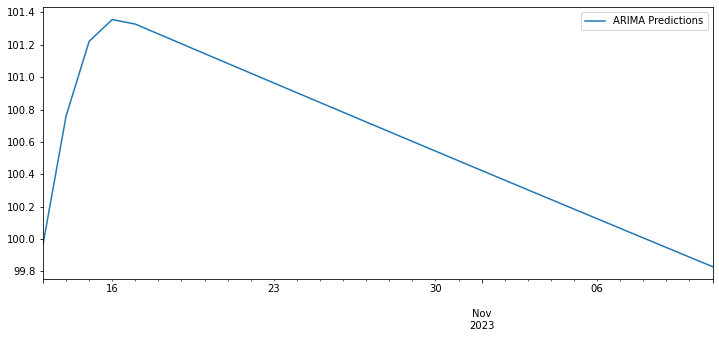

In [93]:
pred.plot(figsize=(12,5),legend=True)